In [148]:
import sys
sys.path.append('../')

import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import SubsetRandomSampler
import numpy as np
import random

import numpy as np
import pandas as pd
import os
import glob
import tqdm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import sklearn

from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np

from PIL import ImageFilter
from PIL import Image

eps = np.finfo(float).eps

plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

from data import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
# Enable CUDA, set tensor type and device
use_cuda = False
if use_cuda:
    dtype = torch.cuda.FloatTensor
    device = torch.device("cuda")
    torch.cuda.set_device(0)
    print('GPU')
else:
    dtype = torch.FloatTensor
    device = torch.device("cpu")

In [115]:
# transform = [transforms.Resize((64, 64)), transforms.ToTensor()]
in_channels = 3
# Get train and test loaders for dataset
loader = Loader('cifar10', '../data', True, 32, transform, None, use_cuda)
train_loader = loader.train_loader
test_loader = loader.test_loader

Files already downloaded and verified
Files already downloaded and verified


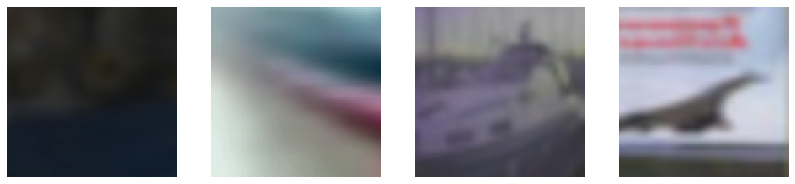

In [119]:
_, ax = plt.subplots(1, 4, figsize=(14, 18))
ax = ax.flatten()

x, _ = next(iter(test_loader))

transform_func = get_transforms()

for ind, ax1 in enumerate(ax):
    tensor_im = x[ind].squeeze(0)
    im_tensor = transform_func(tensor_im)
    im = np.transpose(im_tensor.numpy(), (1, 2, 0))
    ax1.imshow(im)  
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')

for ax1 in ax:
    ax1.axis('off')
plt.axis('off')
_ = plt.show()

### New dataloader

In [ ]:
# transform = [transforms.Resize((64, 64)), transforms.ToTensor()]
in_channels = 3
# Get train and test loaders for dataset
loader = Loader('cifar10', '../data', True, 32, transform, None, use_cuda)
train_loader = loader.train_loader
test_loader = loader.test_loader

In [142]:
class CIFAR10C(datasets.CIFAR10):
    def __init__(self, *args, **kwargs):
        super(CIFAR10C, self).__init__(*args, **kwargs)
        self.transform = get_transforms()

    def __getitem__(self, index):
        img, target = self.data[index], self.targets[index]

        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        xi = Image.fromarray(img)
        xj = Image.fromarray(img)

        if self.transform is not None:
            xi = self.transform(xi)
            xj = self.transform(xj)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return xi, xj, target

In [145]:
ds = CIFAR10C('data', download=True)

In [160]:
from data import *
# transform = [transforms.Resize((64, 64)), transforms.ToTensor()]
in_channels = 3
# Get train and test loaders for dataset
loader = Loader('CIFAR10C', 'data', True, 32, None, None, use_cuda)
train_loader = loader.train_loader
test_loader = loader.test_loader

Files already downloaded and verified
Files already downloaded and verified


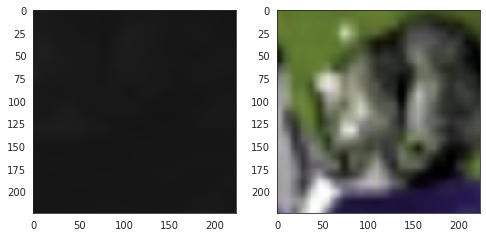

In [166]:
xi, xj, _ = next(iter(test_loader))


def tensor2im(x, ind=0):
    tensor_im = x[ind].squeeze(0)
    im_tensor = transform_func(tensor_im)
    im = np.transpose(im_tensor.numpy(), (1, 2, 0))
    return im

im_xi = tensor2im(xi, 0)
im_xj = tensor2im(xj, 0)
plt.rcParams['figure.figsize'] = 8, 8
with sns.axes_style('white'):
    fig, axis = plt.subplots(nrows=1, ncols=2)
    
    axis[0].imshow(im_xi, cmap='gray')
    axis[0].set_title('')
    
    axis[1].imshow(im_xj, cmap='gray')
    axis[1].set_title('')


### Testing the loss function